In [0]:
!pip install sentinelhub

In [0]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from shapely.geometry import shape, Polygon
from sentinelhub import BBox, OsmSplitter, read_data, CRS, WcsRequest, MimeType

In [0]:
# Sentinel-Hub configuration
INSTANCE_ID = ''
LAYER = ''
DATA_FOLDER = './data/raw/'

In [0]:
def get_bounding_boxes(geo_json_file):

    # Loading geometry of area of interest (AOI)
    geo_json = read_data(geo_json_file)
    AOI = shape(geo_json['features'][0]['geometry'])

    ## Split the area into smaller bounding boxes which can be used for obtaining data by calling WMS/WCS requests.
    osm_splitter = OsmSplitter([AOI], CRS.WGS84, zoom_level=10)

    bounding_boxes = []
    for bbox in osm_splitter.get_bbox_list():
      bounding_boxes.append(list(bbox))
    bounding_boxes = np.array(bounding_boxes)

    return bounding_boxes

In [0]:
def request_data(AOI, time_range, cloud_cover=0.0):

    AOI_bbox = BBox(bbox=AOI, crs=CRS.WGS84)

    wms_bands_request = WcsRequest(layer=LAYER,
                               bbox=AOI_bbox,
                               time=time_range, # acquisition date
                               maxcc=cloud_cover,
                               resx='10m', resy='10m',
                               image_format=MimeType.TIFF_d32f,
                               instance_id=INSTANCE_ID,
                               data_folder=DATA_FOLDER)

    wms_bands_img = wms_bands_request.get_data(save_data=True) # Save downloaded data to disk
    
    return wms_bands_img

In [0]:
def plot_image(image, factor=1):
    fig = plt.subplots(nrows=1, ncols=1, figsize=(15, 7))

    if np.issubdtype(image.dtype, np.floating):
        plt.imshow(np.minimum(image * factor, 1))
    else:
        plt.imshow(image)

## Loading Area of Interest GeoJSON file 

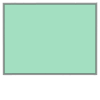

In [0]:
geo_file = 'york.geo.json'

york_geo = read_data(geo_file)
york_area = shape(geo_AOI["features"][0]["geometry"])
york_area

## Getting lat/lon bounding boxes from GeoJSON file 

In [0]:
york_bbox = get_bounding_boxes(york_geo_path)
york_bbox

array([[-98.0859375 ,  40.44694706, -97.734375  ,  40.71395583],
       [-98.0859375 ,  40.71395583, -97.734375  ,  40.97989807],
       [-97.734375  ,  40.44694706, -97.3828125 ,  40.71395583],
       [-97.734375  ,  40.71395583, -97.3828125 ,  40.97989807],
       [-97.3828125 ,  40.44694706, -97.03125   ,  40.71395583],
       [-97.3828125 ,  40.71395583, -97.03125   ,  40.97989807],
       [-98.0859375 ,  40.97989807, -97.734375  ,  41.24477234],
       [-97.734375  ,  40.97989807, -97.3828125 ,  41.24477234],
       [-97.3828125 ,  40.97989807, -97.03125   ,  41.24477234]])

## Fetching satellite data based on bounding boxes

In [0]:
satellite_img = request_data(list(york_bbox[0]), ('2018-07-01', '2018-07-15'), cloud_cover=0.0)

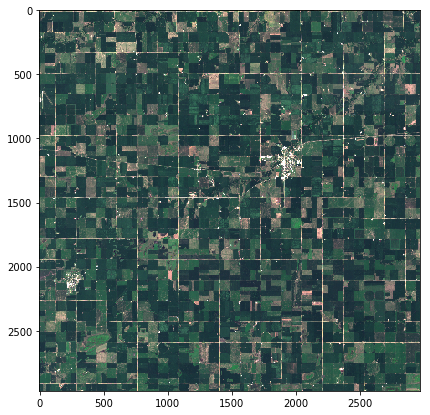

In [0]:
plot_image(satellite_img[0][:, :, [3, 2, 1]], 7)